In [ ]:
import xlwt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
!gdown 1ymWz1beGDSRZi1apkYDF1vN02GKj1S9W

Downloading...
From: https://drive.google.com/uc?id=1ymWz1beGDSRZi1apkYDF1vN02GKj1S9W
To: /content/audit_risk.csv
100% 81.2k/81.2k [00:00<00:00, 54.0MB/s]


#Import Data

In [ ]:
data = pd.read_csv('audit_risk.csv')

In [ ]:
# cek head dari data
data.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


# EDA & Preprocessing Data

In [ ]:
data.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [ ]:
# cek missing values
data.isna().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [ ]:
# Isi missing value pada Money_Value menggunakan mean
data['Money_Value'].fillna(data['Money_Value'].mean(), inplace=True)

In [ ]:
data.isna().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [ ]:
# Drop kolom yang tidak relevan
data.drop(['TOTAL'], axis=1, inplace=True)

In [ ]:
data.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value',
       'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History',
       'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


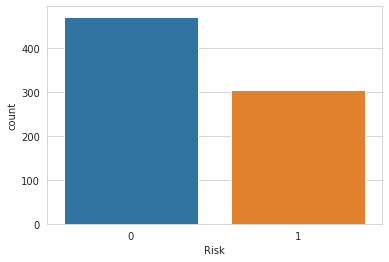

In [ ]:
# Menampilkan jumlah data per target class
sns.set_style('whitegrid')
sns.countplot(data['Risk'])

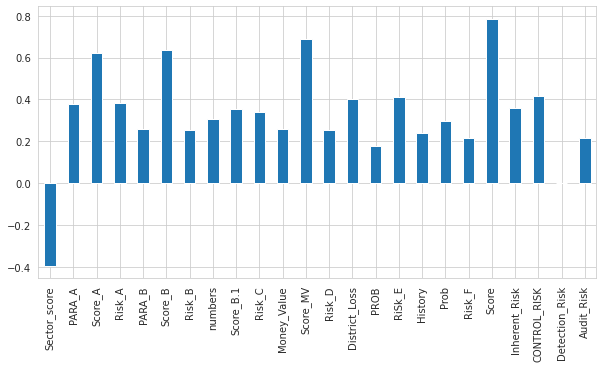

In [ ]:
# Korelasi Risk dengan fitur lainnya
plt.figure(figsize=(10,5))
data.drop(['Risk'], axis=1).corrwith(data['Risk']).plot.bar()
plt.show()

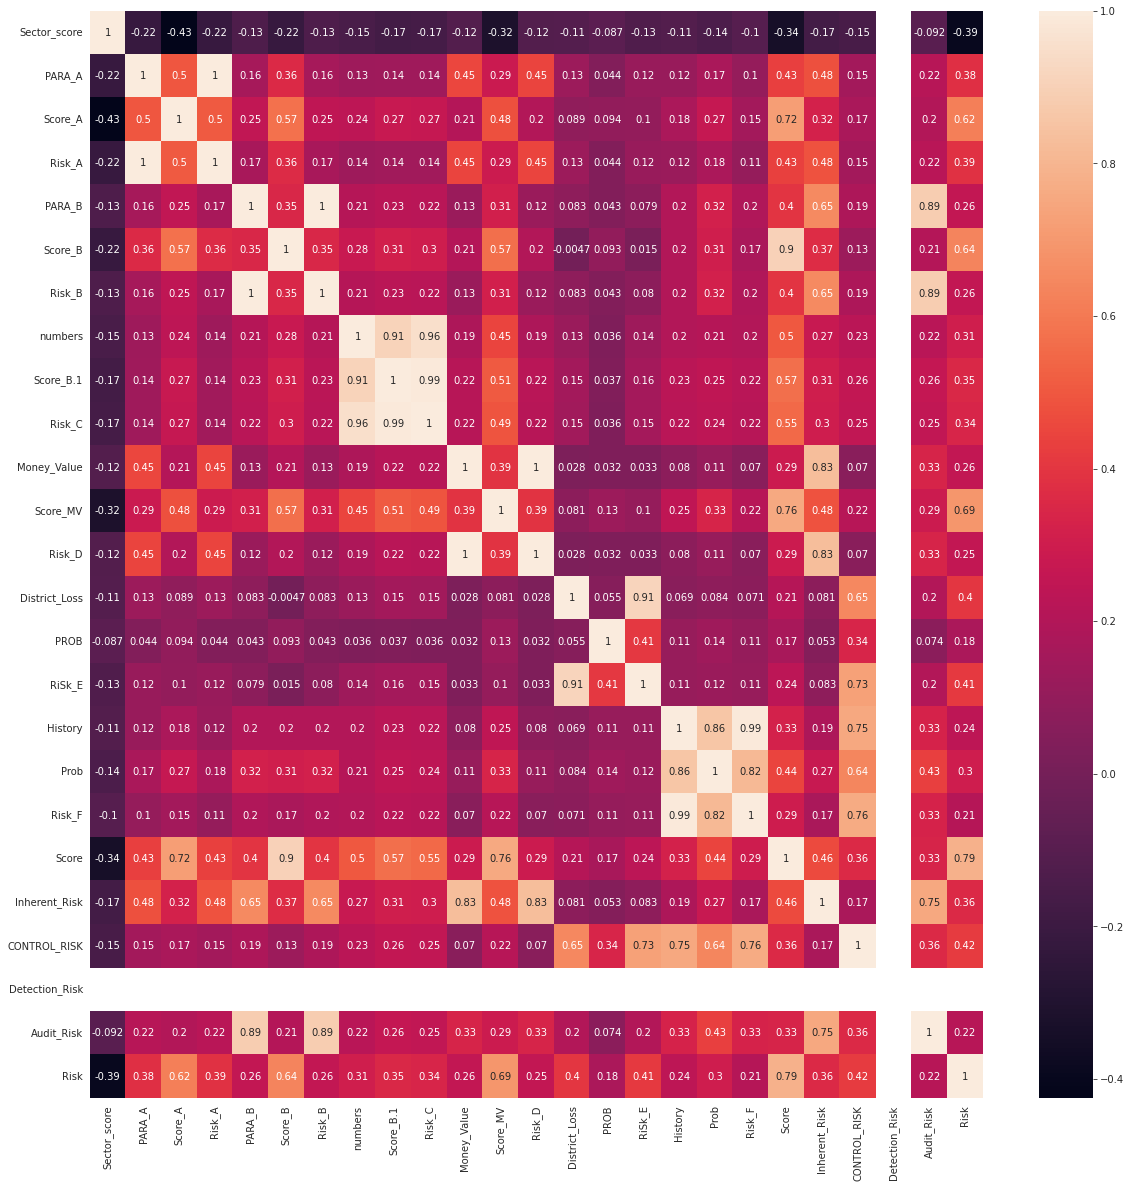

In [ ]:
# Menampilkan heatmap korelasi antar fitur
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
# Drop kolom yang tidak relevan
data.drop(['Detection_Risk'], axis=1, inplace=True)

In [ ]:
data.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value',
       'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History',
       'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Audit_Risk', 'Risk'],
      dtype='object')

In [ ]:
data['LOCATION_ID'].unique()


array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [ ]:
data = data[(data['LOCATION_ID'] != 'LOHARU')]
data = data[(data['LOCATION_ID'] != 'NUH')]
data = data[(data['LOCATION_ID'] != 'SAFIDON')]
data = data.astype(float)

In [ ]:
# Menghapus data duplikat
data = data.drop_duplicates(keep='first')

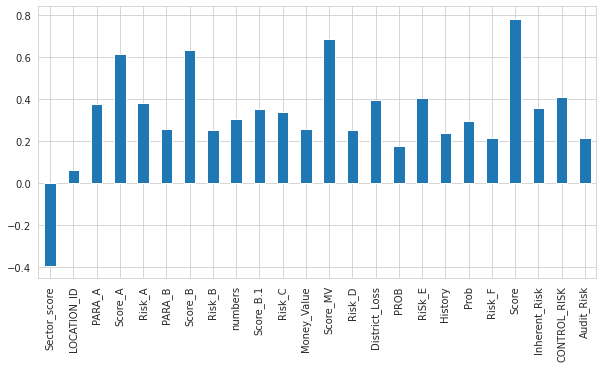

In [ ]:
# Korelasi Risk dengan fitur lainnya
plt.figure(figsize=(10,5))
data.drop(['Risk'], axis=1).corrwith(data['Risk']).plot.bar()
plt.show()

# Train Test Split

In [ ]:
# memecah data menjadi train, validation, dan test dataset dengan rasio 60:20:20
from sklearn.model_selection import train_test_split
train, temp = train_test_split(data, test_size=0.4, random_state=101)
test, validation = train_test_split(temp, test_size=0.5, random_state=101)
print('Banyaknya data train:', train.shape[0])
print('Banyaknya data validation:', validation.shape[0])
print('Banyaknya data test:', test.shape[0])

Banyaknya data train: 456
Banyaknya data validation: 152
Banyaknya data test: 152


In [ ]:
X_train = train.drop(['Risk'], axis=1)
X_validation = validation.drop(['Risk'], axis=1)
X_test = test.drop(['Risk'], axis=1)
y_train = train['Risk']
y_validation = validation['Risk']
y_test = test['Risk']

# Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
# membuat objek StandardScaler yang bernama scaler
scaler = StandardScaler()
# fit scaler ke features, transform features ke versi scaled
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train))
X_test_sc = pd.DataFrame(scaler.fit_transform(X_test))
X_validation_sc = pd.DataFrame(scaler.fit_transform(X_validation))

# Build Model, Tune Hyperparameters

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

def create_model_1hl(activation, lr):
  model = Sequential()
  model.add(Dense(32, input_shape = (X_train_sc.shape[1],)))
  model.add(Dense(32, Activation(activation)))
  model.add(Dense(1))
  learning_rate = lr
  optimizer = optimizers.SGD(learning_rate)
  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer = optimizer,
                metrics = ['accuracy'])
  return model

def create_model_3hl(activation, lr):
  model = Sequential()
  model.add(Dense(32, input_shape = (X_train_sc.shape[1],)))
  model.add(Dense(32, Activation(activation)))
  model.add(Dense(64, Activation(activation)))
  model.add(Dense(128, Activation(activation)))
  model.add(Dense(1))
  learning_rate = lr
  optimizer = optimizers.SGD(learning_rate)
  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer = optimizer,
                metrics = ['accuracy'])
  return model

In [ ]:
ep = [200, 400]
learning_rates = [0.001, 0.01]
activations = ['relu', 'sigmoid']

# menggunakan model 1 hidden layer
acc_list = []
hl = 1
for e in ep:
  for lr in learning_rates:
      for act in activations:
        model1 = create_model_1hl(act, lr)
        history = model1.fit(
            X_train_sc,
            y_train,
            batch_size = 20,
            epochs = e,
            verbose = 1,
            shuffle = True,
            steps_per_epoch = int(X_train_sc.shape[0]/20),
            validation_data = (X_validation_sc, y_validation)
        )
        val_acc = history.history['val_accuracy']
        acc_list.append({'hidden_layers': hl,
                         'epoch': e,
                         'learning_rate': lr,
                         'activation': act,
                         'accuracy': np.max(val_acc)})

# menggunakan model 3 hidden layer
hl = 3
for e in ep:
  for lr in learning_rates:
      for act in activations:
        model2 = create_model_3hl(act, lr)
        history = model2.fit(
            X_train_sc,
            y_train,
            batch_size = 20,
            epochs = e,
            verbose = 1,
            shuffle = True,
            steps_per_epoch = int(X_train_sc.shape[0]/20),
            validation_data = (X_validation_sc, y_validation)
        )
        val_acc = history.history['val_accuracy']
        acc_list.append({'hidden_layers': hl,
                         'epoch': e,
                         'learning_rate': lr,
                         'activation': act,
                         'accuracy': np.max(val_acc)})

Streaming output truncated to the last 5000 lines.
22/22 [==============================] - 0s 6ms/step - loss: 0.0543 - accuracy: 0.9725 - val_loss: 0.0634 - val_accuracy: 0.9737
Epoch 302/400
22/22 [==============================] - 0s 5ms/step - loss: 0.0581 - accuracy: 0.9748 - val_loss: 0.0633 - val_accuracy: 0.9737
Epoch 303/400
22/22 [==============================] - 0s 5ms/step - loss: 0.0490 - accuracy: 0.9771 - val_loss: 0.0631 - val_accuracy: 0.9737
Epoch 304/400
22/22 [==============================] - 0s 5ms/step - loss: 0.0466 - accuracy: 0.9748 - val_loss: 0.0631 - val_accuracy: 0.9737
Epoch 305/400
22/22 [==============================] - 0s 5ms/step - loss: 0.0550 - accuracy: 0.9771 - val_loss: 0.0632 - val_accuracy: 0.9737
Epoch 306/400
22/22 [==============================] - 0s 5ms/step - loss: 0.0549 - accuracy: 0.9748 - val_loss: 0.0635 - val_accuracy: 0.9737
Epoch 307/400
22/22 [==============================] - 0s 5ms/step - loss: 0.0488 - accuracy: 0.9771 - va

In [ ]:
# Menampilkan best hyperparameter
max_acc = max(acc_list, key=lambda x:x['accuracy'])
print(max_acc)

{'hidden_layers': 1, 'epoch': 200, 'learning_rate': 0.01, 'activation': 'relu', 'accuracy': 0.9736841917037964}


In [ ]:
# Menampilkan akurasi dari setiap pasang hyperparameter
print(sorted(acc_list, key=lambda x:x['accuracy'], reverse=True))

[{'hidden_layers': 1, 'epoch': 200, 'learning_rate': 0.01, 'activation': 'relu', 'accuracy': 0.9736841917037964}, {'hidden_layers': 1, 'epoch': 200, 'learning_rate': 0.01, 'activation': 'sigmoid', 'accuracy': 0.9736841917037964}, {'hidden_layers': 1, 'epoch': 400, 'learning_rate': 0.001, 'activation': 'relu', 'accuracy': 0.9736841917037964}, {'hidden_layers': 1, 'epoch': 400, 'learning_rate': 0.01, 'activation': 'sigmoid', 'accuracy': 0.9736841917037964}, {'hidden_layers': 3, 'epoch': 400, 'learning_rate': 0.01, 'activation': 'sigmoid', 'accuracy': 0.9736841917037964}, {'hidden_layers': 1, 'epoch': 400, 'learning_rate': 0.001, 'activation': 'sigmoid', 'accuracy': 0.9671052694320679}, {'hidden_layers': 3, 'epoch': 200, 'learning_rate': 0.01, 'activation': 'relu', 'accuracy': 0.9671052694320679}, {'hidden_layers': 1, 'epoch': 400, 'learning_rate': 0.01, 'activation': 'relu', 'accuracy': 0.9605262875556946}, {'hidden_layers': 3, 'epoch': 400, 'learning_rate': 0.01, 'activation': 'relu', '

# Train Model dengan Best Hyperparameter

In [ ]:
model = create_model_1hl('relu', 0.01)
history = model.fit(
    X_train_sc,
    y_train,
    batch_size = 20,
    epochs = 200,
    verbose = 1,
    shuffle = True,
    steps_per_epoch = int(X_train_sc.shape[0]/20),
    validation_data = (X_validation_sc, y_validation)
)

Epoch 1/200
22/22 [==============================] - 1s 11ms/step - loss: 0.6425 - accuracy: 0.7636 - val_loss: 0.5788 - val_accuracy: 0.7961
Epoch 2/200
22/22 [==============================] - 0s 4ms/step - loss: 0.4926 - accuracy: 0.8624 - val_loss: 0.4623 - val_accuracy: 0.8618
Epoch 3/200
22/22 [==============================] - 0s 4ms/step - loss: 0.4113 - accuracy: 0.8807 - val_loss: 0.3884 - val_accuracy: 0.8882
Epoch 4/200
22/22 [==============================] - 0s 4ms/step - loss: 0.3497 - accuracy: 0.9083 - val_loss: 0.3336 - val_accuracy: 0.9013
Epoch 5/200
22/22 [==============================] - 0s 4ms/step - loss: 0.2940 - accuracy: 0.9174 - val_loss: 0.2916 - val_accuracy: 0.9013
Epoch 6/200
22/22 [==============================] - 0s 4ms/step - loss: 0.2595 - accuracy: 0.9060 - val_loss: 0.2621 - val_accuracy: 0.9079
Epoch 7/200
22/22 [==============================] - 0s 5ms/step - loss: 0.2351 - accuracy: 0.9266 - val_loss: 0.2359 - val_accuracy: 0.9079
Epoch 8/200


# Testing, Model Evaluation

5/5 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97        86
         1.0       0.98      0.92      0.95        66

    accuracy                           0.96       152
   macro avg       0.96      0.96      0.96       152
weighted avg       0.96      0.96      0.96       152




[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

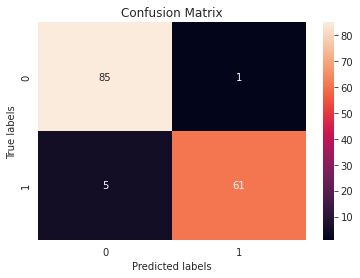

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_sc)
y_pred = y_pred > 0.5
print(classification_report(y_test, y_pred))
print()

ax = plt.subplot()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

# Menyimpan Output Testing ke File

In [ ]:
workbook = xlwt.Workbook()
worksheet = workbook.add_sheet('result')
col = 0
for name in X_test.columns:
  worksheet.write(0, col, name)
  col += 1
worksheet.write(0, col, 'True label')
col += 1
worksheet.write(0, col, 'Predicted label')
row = 1
for i in range(len(X_test)):
  col = 0
  for name in X_test.columns:
    worksheet.write(row, col, float(X_test.iloc[i][name]))
    col += 1
  worksheet.write(row, col, int(y_test.iloc[i]))
  col += 1
  worksheet.write(row, col, int(y_pred[i][0]))
  row = row + 1
workbook.save('result.xls')